t=200  bb=102.30000000000001  ba=103.0  sp=0.6999999999999886  db=4.0  da=7.0  trades_step=19
t=200  bb=102.4  ba=102.80000000000001  sp=0.4000000000000057  db=59.0  da=51.0  trades_step=2
t=200  bb=109.2  ba=109.4  sp=0.20000000000000284  db=30.0  da=2.0  trades_step=1
t=200  bb=98.0  ba=98.4  sp=0.4000000000000057  db=56.0  da=56.0  trades_step=0
t=200  bb=101.7  ba=102.0  sp=0.29999999999999716  db=15.0  da=21.0  trades_step=31
t=200  bb=105.60000000000001  ba=105.9  sp=0.29999999999999716  db=15.0  da=44.0  trades_step=25
t=200  bb=98.7  ba=99.10000000000001  sp=0.4000000000000057  db=60.0  da=59.0  trades_step=19
t=200  bb=87.80000000000001  ba=88.10000000000001  sp=0.29999999999999716  db=20.0  da=14.0  trades_step=21
t=200  bb=98.60000000000001  ba=99.30000000000001  sp=0.7000000000000028  db=6.0  da=4.0  trades_step=18
t=200  bb=113.80000000000001  ba=114.5  sp=0.6999999999999886  db=7.0  da=4.0  trades_step=18
t=200  bb=100.80000000000001  ba=101.60000000000001  sp=0.799999999

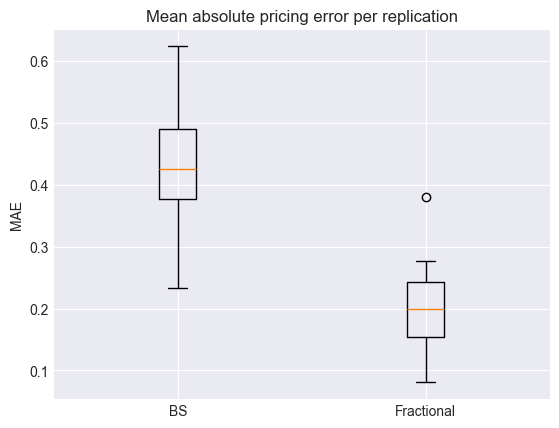

{'option_type': 'put',
 'alpha_frac': 0.5,
 'mean_abs_err_bs': 0.4270060136198638,
 'mean_abs_err_frac': 0.20520279719093923,
 'paired_ttest_t': 17.70938746394617,
 'paired_ttest_p': 2.6470501905731433e-08,
 'wilcoxon_stat': 0.0,
 'wilcoxon_p': 0.001953125,
 'ks_stat': 0.42,
 'ks_p': 0.0002460240344273171,
 'n_rep': 10,
 'n_paths': 200,
 'n_mc': 40000}

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from analysis import run_h1_pricing_experiment
from visualization import plot_error_box
from analysis import run_abm_paths, estimate_sigma
from model import ABMModel 
plt.style.use('seaborn-v0_8-darkgrid')


cfg = dict(
    S0=100.0,
    dt=1/252,
    steps=252,
    n_fund=50,
    n_noise=50,
    n_chart=50,
    n_mm=4,
    fundamental_price=100.0,
    tick_size=0.1,
    impact=0.07,
    omega=1e-6,
    alpha_var=0.05,
    beta_var=0.94,
    fund_strength=0.1,
    chart_strength=0.6,
    chart_vol_sens=2.0,
    mom_window=20,
    vol_window=20,
    agent_noise=0.15,
    p01=0.02,
    p10=0.10,
    shock_rate=0.01,
    shock_impact=8.0,
    n_events_calm=400,
    n_events_stress=1200
)

dt = cfg["dt"]
steps = cfg["steps"]
r = 0.0

K_grid = [70, 80, 90, 95, 100]

paths = run_abm_paths(cfg, n_paths=50, seed0=1)
print("zero-return share:", (np.diff(paths, axis=1) == 0).mean())
print("min moves per path:", np.min(np.sum(np.diff(paths, axis=1) != 0, axis=1)))


df, by_rep, summary = run_h1_pricing_experiment(
    cfg=cfg,
    dt=dt,
    steps=steps,
    r=r,
    K_grid=K_grid,
    option_type="put",
    alpha_frac=0.5,
    n_paths=200,
    n_mc=40000,
    n_rep=10,
    seed0=999
)

plot_error_box(by_rep)
summary


In [15]:
cfg_dbg = dict(cfg)
cfg_dbg.update(dict(
    debug=True,
    debug_print_every=0,
    debug_snapshot_every=25,
    debug_l2_depth=10,
    max_events=3000,
))

m = ABMModel(seed=999, **cfg_dbg)
prices = m.run()

df = pd.DataFrame({
    "t": np.arange(len(m.regime_log)),
    "price": np.array(m.market.prices[1:], dtype=float),
    "ret": np.array(m.market.log_returns, dtype=float),
    "regime": np.array(m.regime_log, dtype=int),
    "spread": np.array(m.spread_log, dtype=float),
    "depth_bid": np.array(m.depth_bid_log, dtype=float),
    "depth_ask": np.array(m.depth_ask_log, dtype=float),
    "imb": np.array(m.imbalance_log, dtype=float),
    "trades": np.array(m.trade_count_log, dtype=int),
    "vol": np.array(m.volume_log, dtype=float),
    "n_events": np.array(m.n_events_log, dtype=int),
    "Lambda_reg": np.array(m.lambda_reg_log, dtype=float),
    "cap_hit": np.array(m.hawkes_cap_hit_log, dtype=int),
    "bb_none": np.array(m.bb_none_log, dtype=int),
    "ba_none": np.array(m.ba_none_log, dtype=int),
    "orders": np.array(m.order_count_log, dtype=int),
    "bid_lvls": np.array(m.bid_levels_log, dtype=int),
    "ask_lvls": np.array(m.ask_levels_log, dtype=int),
    "crossed": np.array(m.crossed_log, dtype=int),
    "n_limit": np.array(m.n_limit_log, dtype=int),
    "n_market": np.array(m.n_market_log, dtype=int),
    "n_cancel": np.array(m.n_cancel_log, dtype=int),
    "n_expire": np.array(m.n_expire_log, dtype=int),
    "mm_requote": np.array(m.mm_requotes_log, dtype=int),
    "meta_active": np.array(m.meta_active_log, dtype=int),
    "meta_left": np.array(m.meta_left_log, dtype=int),
    "meta_intensity": np.array(m.meta_intensity_log, dtype=int),
    "meta_side": np.array(m.meta_side_log, dtype=int),
})

df.head(20)
# df.info()


t=200  bb=89.60000000000001  ba=89.9  sp=0.29999999999999716  db=9.0  da=15.0  trades_step=29


,t,price,ret,regime,spread,depth_bid,depth_ask,imb,trades,vol,...,crossed,n_limit,n_market,n_cancel,n_expire,mm_requote,meta_active,meta_left,meta_intensity,meta_side
0,0,100.2,0.000000,0,0.4,59.0,59.0,0.000000,2,2.0,...,0,40,2,0,0,4,0,0,0,-1
1,1,100.2,0.000000,0,0.4,59.0,58.0,0.008547,1,1.0,...,0,0,1,0,0,0,0,0,0,-1
2,2,99.8,0.000000,0,0.4,58.0,58.0,0.000000,1,1.0,...,0,0,1,0,0,0,0,0,0,-1
3,3,100.2,0.000000,0,0.4,58.0,56.0,0.017544,2,2.0,...,0,0,2,0,0,0,0,0,0,-1
4,4,100.2,0.000000,0,0.4,43.0,39.0,0.048780,2,2.0,...,0,0,2,0,8,0,0,0,0,-1
5,5,99.8,0.000000,1,0.4,30.0,30.0,0.000000,3,3.0,...,0,0,3,0,8,0,0,0,0,-1
6,6,100.0,0.002002,1,0.4,30.0,30.0,0.000000,0,0.0,...,0,4,0,2,2,1,0,0,0,-1
7,7,100.2,0.000000,1,0.8,10.0,10.0,0.000000,1,1.0,...,0,6,1,4,14,1,0,0,0,-1
8,8,99.8,0.000000,0,0.4,59.0,60.0,-0.008403,1,1.0,...,0,28,1,4,0,4,0,0,0,-1
9,9,99.9,0.001002,0,0.2,59.0,1.0,0.966667,0,0.0,...,0,1,0,0,8,0,0,0,0,-1


In [16]:
zero_ret = float((df["ret"] == 0).mean())
bb_missing = float(df["bb_none"].mean())
ba_missing = float(df["ba_none"].mean())
crossed = int(df["crossed"].sum())
cap_share = float(df["cap_hit"].mean())

print("zero-return share:", zero_ret)
print("bb missing share:", bb_missing, "ba missing share:", ba_missing)
print("crossed count:", crossed)
print("hawkes cap-hit share:", cap_share)

print("avg events:", float(df["n_events"].mean()), "max events:", int(df["n_events"].max()))
print("avg spread:", float(df["spread"].mean()), "min spread:", float(df["spread"].min()))
print("avg trades/step:", float(df["trades"].mean()), "avg vol/step:", float(df["vol"].mean()))
print("avg limits/mkt/cancel:", float(df["n_limit"].mean()), float(df["n_market"].mean()), float(df["n_cancel"].mean()))
print("mm requote rate:", float(df["mm_requote"].mean()))


zero-return share: 0.9325396825396826
bb missing share: 0.0 ba missing share: 0.0
crossed count: 0
hawkes cap-hit share: 0.0
avg events: 1.8253968253968254 max events: 7
avg spread: 0.4162698412698406 min spread: 0.09999999999999432
avg trades/step: 12.206349206349206 avg vol/step: 52.34920634920635
avg limits/mkt/cancel: 14.0 6.880952380952381 2.9523809523809526
mm requote rate: 2.8373015873015874


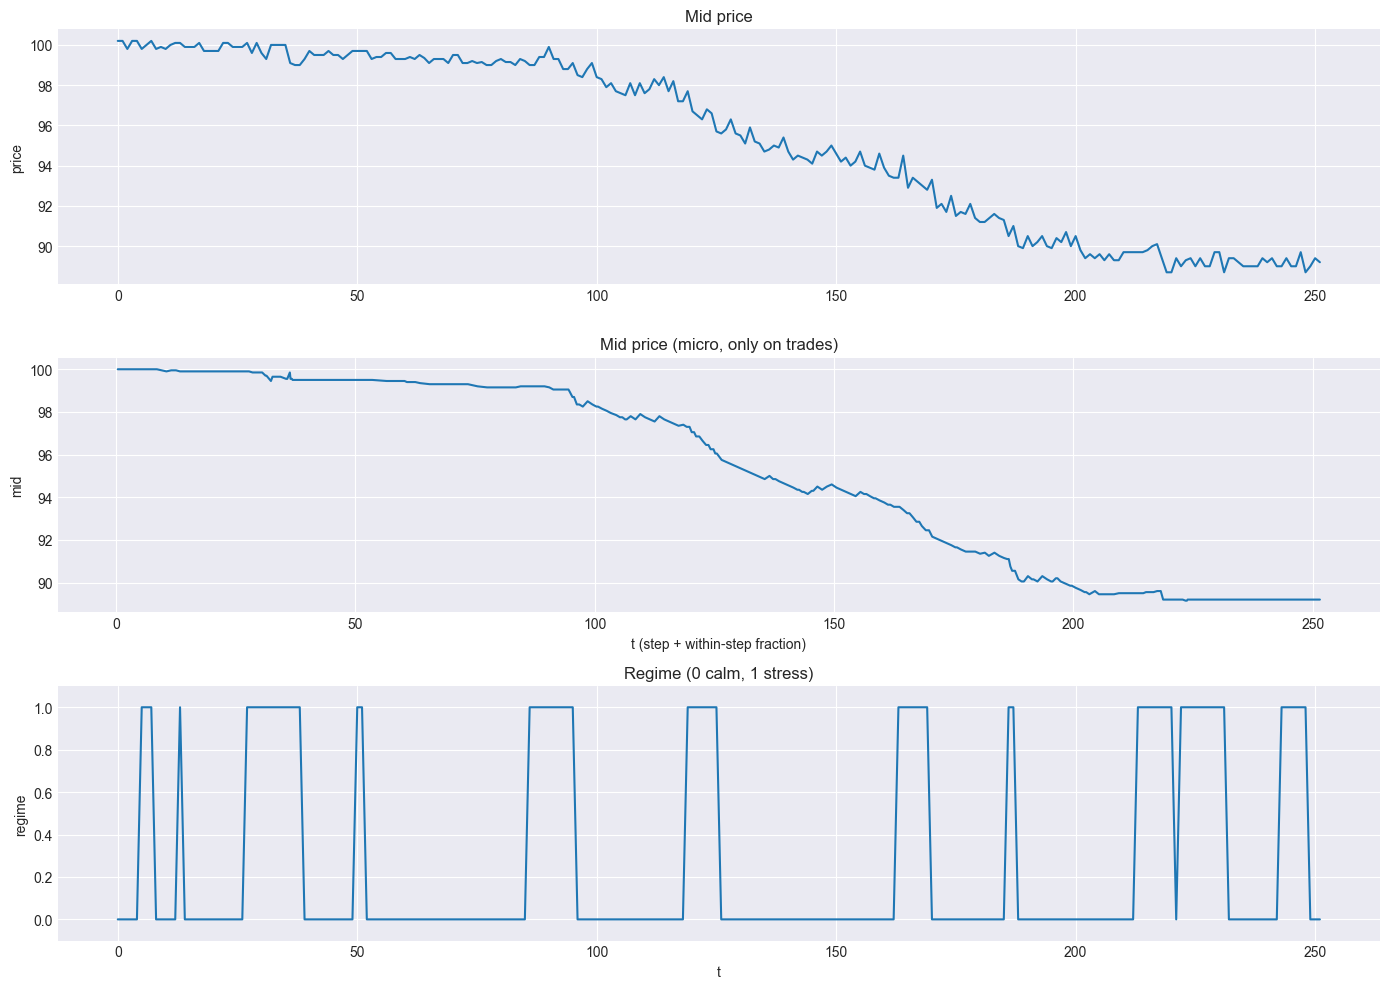

In [17]:
t_micro = np.array([x for x, _ in m.mid_micro_log], dtype=float)
mid_micro = np.array([y for _, y in m.mid_micro_log], dtype=float)

fig, axs = plt.subplots(3, 1, sharex=False, figsize=(14, 10))

axs[0].plot(df["t"], df["price"])
axs[0].set_title("Mid price")
axs[0].set_ylabel("price")

axs[1].plot(t_micro, mid_micro)
axs[1].set_title("Mid price (micro, only on trades)")
axs[1].set_xlabel("t (step + within-step fraction)")
axs[1].set_ylabel("mid")


axs[2].plot(df["t"], df["regime"])
axs[2].set_title("Regime (0 calm, 1 stress)")
axs[2].set_xlabel("t")
axs[2].set_ylabel("regime")
axs[2].set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

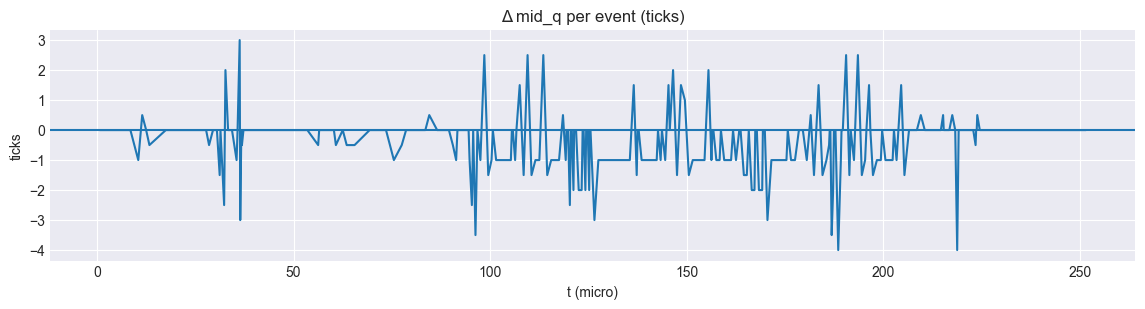

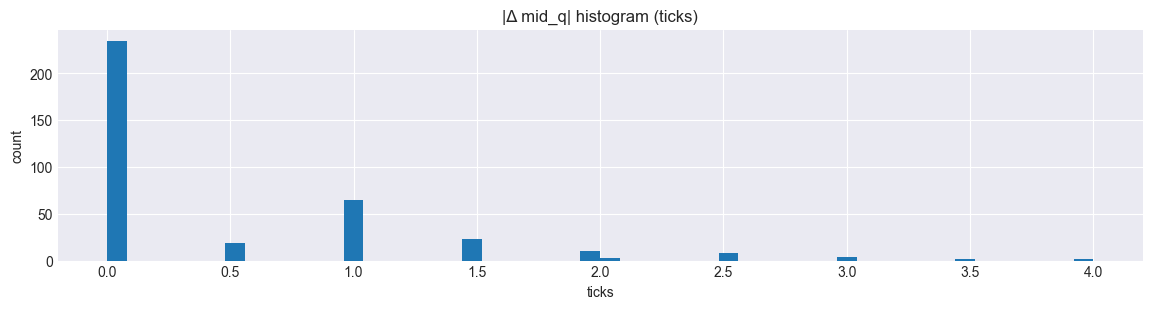

In [18]:
d_mid_ticks = np.diff(mid_micro) / m.tick_size

plt.figure(figsize=(14,3))
plt.plot(t_micro[1:], d_mid_ticks)
plt.title("Δ mid_q per event (ticks)")
plt.xlabel("t (micro)")
plt.ylabel("ticks")
plt.axhline(0.0)
plt.show()

plt.figure(figsize=(14,3))
plt.hist(np.abs(d_mid_ticks), bins=50)
plt.title("|Δ mid_q| histogram (ticks)")
plt.xlabel("ticks")
plt.ylabel("count")
plt.show()


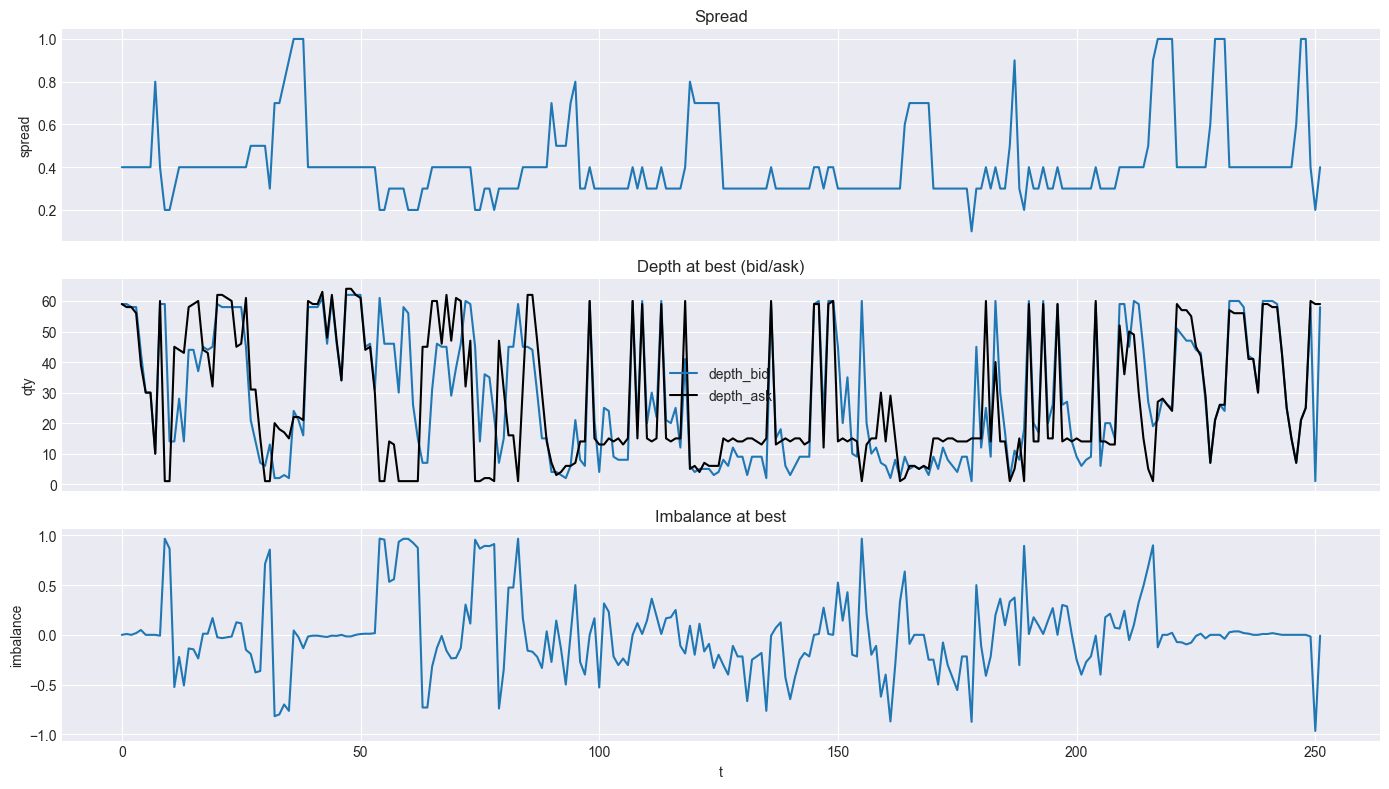

In [19]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(14, 8))

axs[0].plot(df["t"], df["spread"])
axs[0].set_title("Spread")
axs[0].set_ylabel("spread")

axs[1].plot(df["t"], df["depth_bid"], label="depth_bid")
axs[1].plot(df["t"], df["depth_ask"], label="depth_ask", color='k')
axs[1].set_title("Depth at best (bid/ask)")
axs[1].set_ylabel("qty")
axs[1].legend()

axs[2].plot(df["t"], df["imb"])
axs[2].set_title("Imbalance at best")
axs[2].set_xlabel("t")
axs[2].set_ylabel("imbalance")

plt.tight_layout()
plt.show()

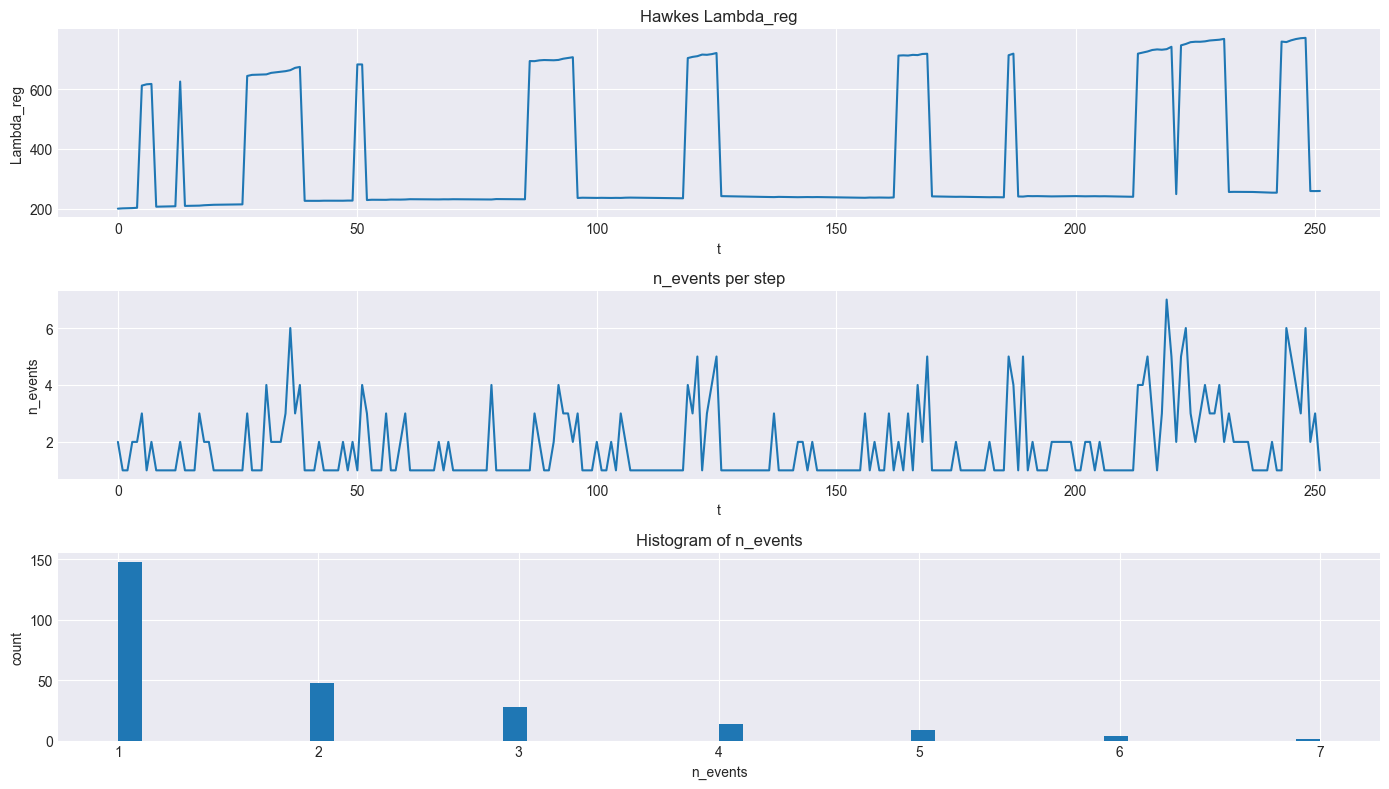

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(14, 8))

axs[0].plot(df["t"], df["Lambda_reg"])
axs[0].set_title("Hawkes Lambda_reg")
axs[0].set_xlabel("t")
axs[0].set_ylabel("Lambda_reg")

axs[1].plot(df["t"], df["n_events"])
axs[1].set_title("n_events per step")
axs[1].set_xlabel("t")
axs[1].set_ylabel("n_events")

axs[2].hist(df["n_events"].values, bins=50)
axs[2].set_title("Histogram of n_events")
axs[2].set_xlabel("n_events")
axs[2].set_ylabel("count")

plt.tight_layout()
plt.show()


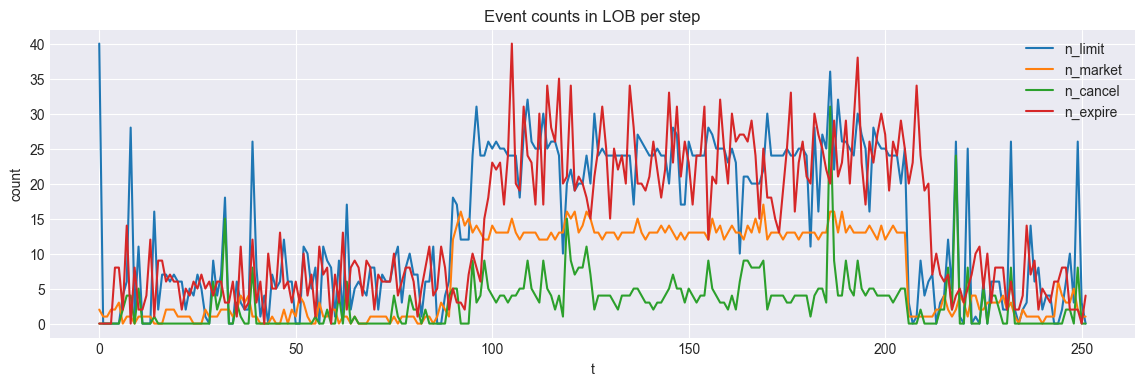

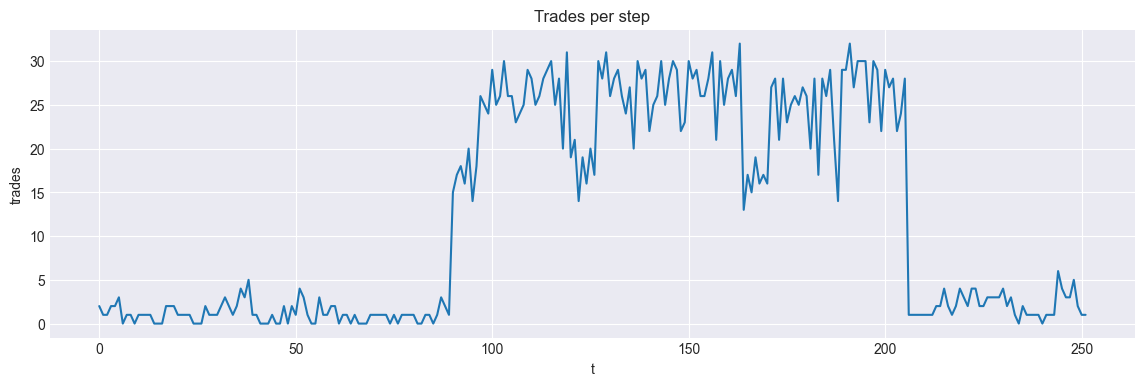

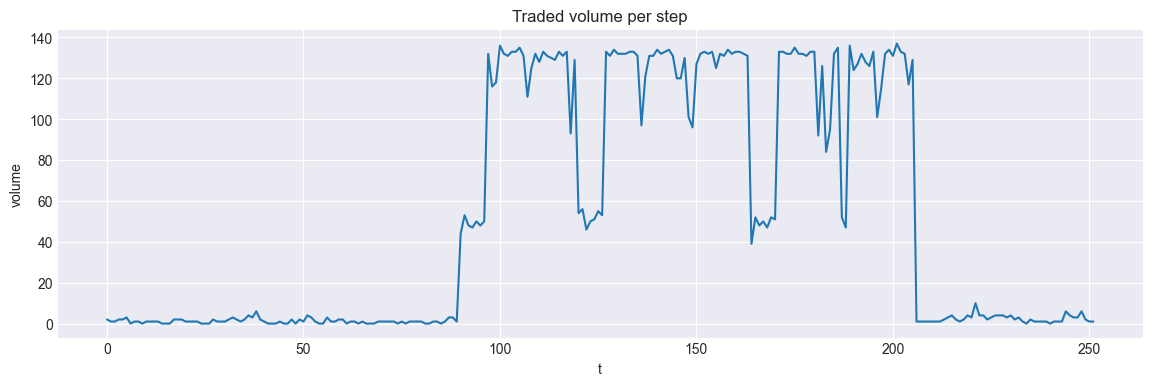

In [21]:
plt.figure(figsize=(14,4))
plt.plot(df["t"], df["n_limit"], label="n_limit")
plt.plot(df["t"], df["n_market"], label="n_market")
plt.plot(df["t"], df["n_cancel"], label="n_cancel")
plt.plot(df["t"], df["n_expire"], label="n_expire")
plt.title("Event counts in LOB per step")
plt.xlabel("t")
plt.ylabel("count")
plt.legend()
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df["t"], df["trades"])
plt.title("Trades per step")
plt.xlabel("t")
plt.ylabel("trades")
plt.show()

plt.figure(figsize=(14,4))
plt.plot(df["t"], df["vol"])
plt.title("Traded volume per step")
plt.xlabel("t")
plt.ylabel("volume")
plt.show()


In [22]:
def show_snapshot(i):
    t, mid, bids, asks = m.l2_snapshots[i]
    print("snapshot", i, "t", t, "mid", mid)
    print("BIDS (ticks, qty):", bids)
    print("ASKS (ticks, qty):", asks)

len(m.l2_snapshots), m.l2_snapshots[0][0] if m.l2_snapshots else None
show_snapshot(0)
show_snapshot(1)
show_snapshot(2)


snapshot 0 t 25 mid 99.9
BIDS (ticks, qty): [(997, 58.0), (996, 21.0), (995, 20.0), (994, 9.0), (993, 6.0)]
ASKS (ticks, qty): [(1001, 45.0), (1002, 28.0), (1003, 15.0), (1004, 12.0), (1005, 12.0)]
snapshot 1 t 50 mid 99.7
BIDS (ticks, qty): [(993, 62.0), (992, 28.0), (991, 17.0), (990, 12.0), (989, 12.0)]
ASKS (ticks, qty): [(997, 62.0), (998, 28.0), (999, 17.0), (1000, 12.0), (1001, 9.0), (1003, 1.0)]
snapshot 2 t 75 mid 99.20000000000002
BIDS (ticks, qty): [(991, 45.0), (990, 21.0), (989, 20.0), (988, 9.0), (987, 12.0)]
ASKS (ticks, qty): [(993, 1.0), (995, 62.0), (996, 28.0), (997, 15.0), (998, 12.0), (999, 9.0)]


t=200  bb=102.30000000000001  ba=103.0  sp=0.6999999999999886  db=4.0  da=7.0  trades_step=19
t=200  bb=107.2  ba=107.4  sp=0.20000000000000284  db=15.0  da=5.0  trades_step=26
t=200  bb=96.60000000000001  ba=96.9  sp=0.29999999999999716  db=7.0  da=15.0  trades_step=16
t=200  bb=100.4  ba=100.80000000000001  sp=0.4000000000000057  db=49.0  da=55.0  trades_step=9
t=200  bb=103.10000000000001  ba=103.5  sp=0.3999999999999915  db=60.0  da=59.0  trades_step=0
t=200  bb=112.7  ba=113.7  sp=1.0  db=11.0  da=25.0  trades_step=6
t=200  bb=97.60000000000001  ba=98.60000000000001  sp=1.0  db=16.0  da=28.0  trades_step=3
t=200  bb=100.2  ba=100.9  sp=0.7000000000000028  db=5.0  da=21.0  trades_step=18
t=200  bb=106.2  ba=106.60000000000001  sp=0.4000000000000057  db=60.0  da=61.0  trades_step=23
t=200  bb=97.30000000000001  ba=97.60000000000001  sp=0.29999999999999716  db=59.0  da=1.0  trades_step=1
t=200  bb=108.80000000000001  ba=109.2  sp=0.3999999999999915  db=57.0  da=56.0  trades_step=1
t=

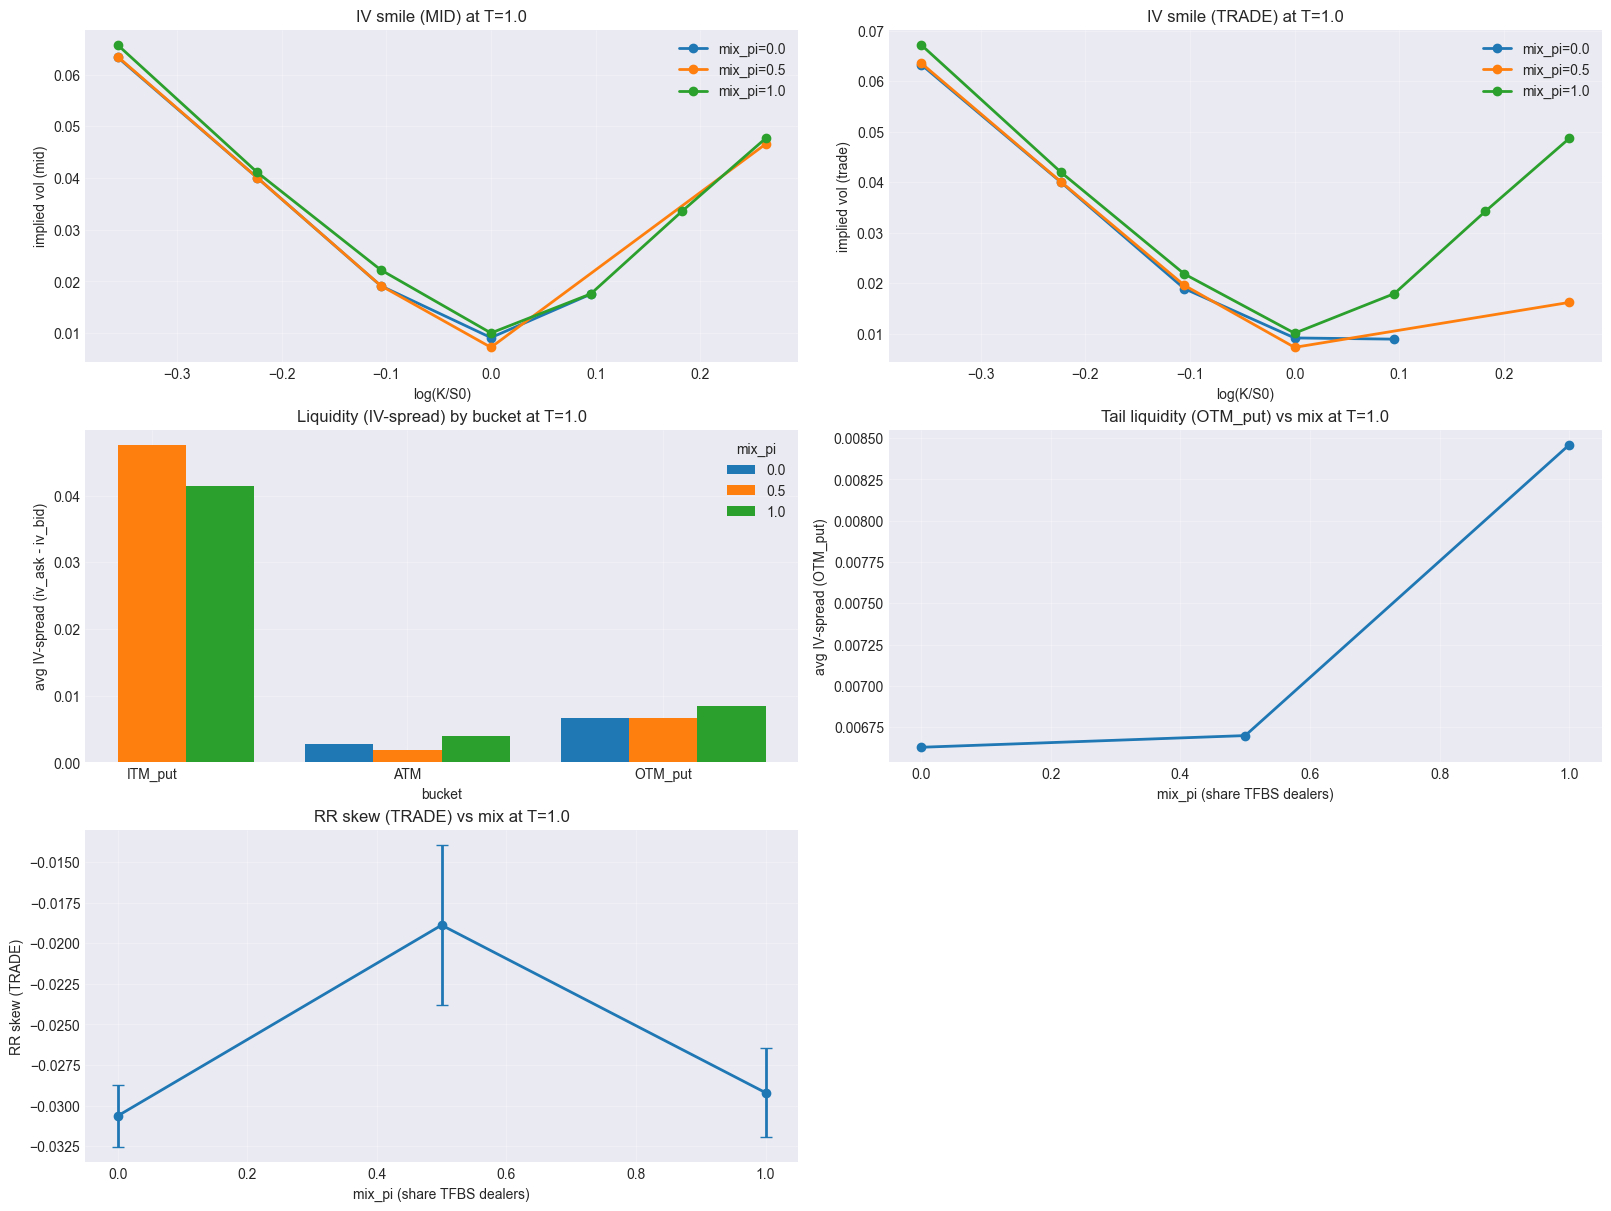

,T,bucket,anova_p_iv_spread_across_mix,anova_p_skew_across_mix
0,0.5,ATM,0.862530,NaN
1,0.5,OTM_put,0.000863,NaN
2,0.5,skew_trade_rr,NaN,0.107267
3,1.0,ATM,0.413864,NaN
4,1.0,OTM_put,0.002453,NaN
5,1.0,skew_trade_rr,NaN,0.043329
6,2.0,ATM,0.325748,NaN
7,2.0,OTM_put,0.001749,NaN
8,2.0,skew_trade_rr,NaN,0.932761


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.stats import f_oneway

from model import ABMModel
from market import LimitOrderBook
from analysis import bs_price_call, bs_price_put, fractional_price_call_mc, fractional_price_put_mc


def implied_vol_bs(price, S0, K, r, T, option_type):
    price = float(price); S0 = float(S0); K = float(K); r = float(r); T = float(T)
    if T <= 0 or S0 <= 0 or K <= 0 or not np.isfinite(price):
        return np.nan

    disc = float(np.exp(-r * T))
    if option_type == "call":
        lo = float(max(0.0, S0 - K * disc))
        hi = float(S0)
        f = lambda s: bs_price_call(S0, K, r, s, T) - price
    else:
        lo = float(max(0.0, K * disc - S0))
        hi = float(K * disc)
        f = lambda s: bs_price_put(S0, K, r, s, T) - price

    eps_b = float(1e-12 * max(1.0, hi))
    if price <= lo + eps_b:
        return 0.0
    if price >= hi - eps_b:
        return 5.0

    if price < lo:
        price = float(lo + eps_b)
    if price > hi:
        price = float(hi - eps_b)

    try:
        return float(brentq(f, 1e-6, 5.0, maxiter=200))
    except Exception:
        return np.nan


def bucket_from_m(m, option_type):
    m = float(m)
    if option_type == "put":
        if m < 0.90:
            return "OTM_put"
        if m > 1.10:
            return "ITM_put"
        return "ATM"
    else:
        if m < 0.90:
            return "ITM_call"
        if m > 1.10:
            return "OTM_call"
        return "ATM"


def estimate_sigma_from_model(m_abm, idx, dt, window):
    lr = np.array(m_abm.market.log_returns[:idx], dtype=float)
    lrw = lr[-int(window):] if lr.size > 0 else lr
    s = float(np.std(lrw) / np.sqrt(float(dt))) if lrw.size >= 2 else 0.05
    return float(max(1e-4, s))


def price_model(S0, K, r, sigma, T, option_type, is_tfbs, alpha_frac, n_mc, seed):
    if not is_tfbs:
        if option_type == "put":
            return float(bs_price_put(S0, K, r, sigma, T))
        return float(bs_price_call(S0, K, r, sigma, T))
    if option_type == "put":
        return float(fractional_price_put_mc(S0, K, r, sigma, T, alpha=alpha_frac, n_mc=int(n_mc), seed=int(seed)))
    return float(fractional_price_call_mc(S0, K, r, sigma, T, alpha=alpha_frac, n_mc=int(n_mc), seed=int(seed)))


def customer_buy_prob(option_type, logm, under_regime, liq, rng):
    logm = float(logm)
    under_regime = float(under_regime)
    liq = float(liq)

    neg = float(max(-logm, 0.0))
    pos = float(max(logm, 0.0))

    if option_type == "put":
        tail = neg
    else:
        tail = pos

    tail_term = float(tail / (tail + 0.12))
    liq_term = float(liq / (liq + 0.002))

    p = 0.50 + 0.25 * under_regime + 0.20 * tail_term + 0.05 * liq_term
    p = float(min(0.95, max(0.05, p)))

    p = float(min(0.97, max(0.03, p + 0.02 * float(rng.normal()))))
    return p


def rr_at_targets(d, iv_col, left_target=-0.22314355, right_target=0.18232156):
    # left_target=log(0.8), right_target=log(1.2) -> более "крылья", чем 0.9/1.1
    g = d.groupby("logm")[iv_col].mean().dropna()
    if g.empty:
        return np.nan
    xs = np.array(sorted(g.index.values), dtype=float)
    if xs.size < 2:
        return np.nan
    xL = xs[np.argmin(np.abs(xs - float(left_target)))]
    xR = xs[np.argmin(np.abs(xs - float(right_target)))]
    yL = float(g.loc[xL])
    yR = float(g.loc[xR])
    return float(yR - yL)


def build_option_quotes_from_lob(
    S0,
    K,
    r,
    sigma,
    T,
    option_type,
    mix_pi,
    alpha_frac,
    n_mc,
    n_dealers,
    under_spread,
    under_depth,
    rng,
    tick_size=1e-4,
    base_halfspread_frac=0.02,
    k_liq=40.0,
    risk_wings=2.0,
    u_stress=None,
    under_regime=None,
):
    S0 = float(S0); K = float(K); r = float(r); sigma = float(sigma); T = float(T)
    mix_pi = float(mix_pi)
    under_spread = float(under_spread) if np.isfinite(under_spread) else 0.0
    under_depth = float(under_depth) if np.isfinite(under_depth) else 1.0
    under_depth = float(max(1.0, under_depth))

    if u_stress is None or not np.isfinite(float(u_stress)):
        u_stress = float(rng.uniform())
    else:
        u_stress = float(u_stress)

    if under_regime is None or not np.isfinite(float(under_regime)):
        under_regime = 0.0
    else:
        under_regime = float(under_regime)

    book = LimitOrderBook(tick_size=float(tick_size), rng=rng)

    n_tfbs = int(round(mix_pi * int(n_dealers)))
    is_tfbs_flags = np.array([1] * n_tfbs + [0] * (int(n_dealers) - n_tfbs), dtype=int)
    rng.shuffle(is_tfbs_flags)

    logm = float(np.log(max(1e-12, K / S0)))
    neg = float(max(-logm, 0.0))
    pos = float(max(logm, 0.0))
    if option_type == "put":
        wing_mult = float(1.0 + risk_wings * (1.8 * neg + 0.6 * pos))
        tail = float(neg)
    else:
        wing_mult = float(1.0 + risk_wings * (1.8 * pos + 0.6 * neg))
        tail = float(pos)

    liq = float((under_spread / max(S0, 1e-12)) * (1.0 + 5.0 / np.sqrt(under_depth)))
    liq_mult = float(1.0 + k_liq * liq)

    p_stress = (
        0.03
        + 0.55 * under_regime
        + 0.55 * mix_pi * (tail / (tail + 0.12))
        + 0.20 * (liq / (liq + 0.002))
    )
    p_stress = float(min(0.97, max(0.01, p_stress)))
    opt_regime = 1 if float(u_stress) < p_stress else 0

    seed_tf = int(rng.integers(1, 2_000_000_000))
    seed_rn = int(rng.integers(1, 2_000_000_000))
    fv_rn = price_model(S0, K, r, sigma, T, option_type, False, alpha_frac, n_mc, seed_rn)
    fv_tf = price_model(S0, K, r, sigma, T, option_type, True,  alpha_frac, n_mc, seed_tf)

    disc = float(np.exp(-r * T))
    if option_type == "put":
        intrinsic = float(max(K * disc - S0, 0.0))
        eps_u = float(1e-12 * max(1.0, K * disc))
        upper = float(K * disc - eps_u)
    else:
        intrinsic = float(max(S0 - K * disc, 0.0))
        eps_u = float(1e-12 * max(1.0, S0))
        upper = float(S0 - eps_u)

    base_q = int(max(1, 5 // (1 + int(2 * abs(logm)))))

    bids_all = []
    asks_all = []

    for j in range(int(n_dealers)):
        is_tfbs = bool(is_tfbs_flags[j] == 1)

        fv = float(fv_tf if is_tfbs else fv_rn)
        fv = float(fv * (1.0 + 0.003 * float(rng.normal())))
        fv = float(max(fv, intrinsic + 1e-10))
        fv = float(min(fv, upper))

        extr = float(max(fv - intrinsic, 1e-10))

        half = float(base_halfspread_frac * wing_mult * liq_mult * extr)
        half = float(max(1e-8, half))

        q = int(base_q)

        if opt_regime == 1:
            half = float(half * (1.0 + 2.0 * tail + 0.7))
            q = int(max(1, round(q * 0.55)))

        if is_tfbs:
            half = float(half * (1.0 + 3.0 * tail + 1.0 * opt_regime))
            q = int(max(1, round(q * 0.55 / (1.0 + 4.5 * tail))))

        # ВАЖНО: симметрично вокруг extrinsic (никаких ручных перекосов)
        bid_extr = float(max(1e-10, extr - half))
        ask_extr = float(extr + half)

        bid = float(intrinsic + bid_extr)
        ask = float(intrinsic + ask_extr)

        bid = float(min(bid, upper - 2e-10))
        ask = float(min(ask, upper))
        if ask <= bid:
            ask = float(min(upper, bid + 1e-10))
        if bid < intrinsic + 1e-10:
            bid = float(intrinsic + 1e-10)
            if ask <= bid:
                ask = float(min(upper, bid + 1e-10))

        bids_all.append(bid)
        asks_all.append(ask)

        book.add_limit(agent_id=j, side="buy", price=bid, qty=q, ttl=10_000)
        book.add_limit(agent_id=j, side="sell", price=ask, qty=q, ttl=10_000)

    bids_all = np.array(bids_all, dtype=float)
    asks_all = np.array(asks_all, dtype=float)

    bid = float(np.quantile(bids_all, 0.70))
    ask = float(np.quantile(asks_all, 0.30))

    if not np.isfinite(bid) or not np.isfinite(ask) or ask <= bid:
        bid = float(np.quantile(bids_all, 0.60))
        ask = float(np.quantile(asks_all, 0.40))

    if not np.isfinite(bid) or not np.isfinite(ask) or ask <= bid:
        bid = float(np.max(bids_all))
        ask = float(np.min(asks_all))

    if not np.isfinite(bid) or not np.isfinite(ask) or ask <= bid:
        return {"bid": np.nan, "ask": np.nan, "mid": np.nan, "spread": np.nan, "opt_regime": opt_regime, "liq": liq}

    mid = float(0.5 * (bid + ask))
    return {"bid": bid, "ask": ask, "mid": mid, "spread": float(ask - bid), "opt_regime": opt_regime, "liq": liq}


def _style_ax(ax):
    ax.grid(True, alpha=0.25)
    for s in ["top", "right"]:
        ax.spines[s].set_visible(False)


def plot_h4(df, skew, T_pick):
    T_pick = float(T_pick)

    fig, axs = plt.subplots(3, 2, figsize=(16, 12), constrained_layout=True)
    ax_mid   = axs[0, 0]
    ax_trade = axs[0, 1]
    ax_liq   = axs[1, 0]
    ax_tail  = axs[1, 1]
    ax_rr    = axs[2, 0]
    axs[2, 1].axis("off")

    # MID smile
    d = df[df["T"] == T_pick].dropna(subset=["iv_mid", "logm"]).copy()
    for mix_pi in sorted(d["mix_pi"].unique()):
        s = (
            d[d["mix_pi"] == mix_pi]
            .groupby("logm", as_index=False)["iv_mid"]
            .mean()
            .sort_values("logm")
        )
        ax_mid.plot(s["logm"].values, s["iv_mid"].values, marker="o", linewidth=2, label=f"mix_pi={mix_pi}")
    ax_mid.set_xlabel("log(K/S0)")
    ax_mid.set_ylabel("implied vol (mid)")
    ax_mid.set_title(f"IV smile (MID) at T={T_pick}")
    ax_mid.legend(frameon=False)
    _style_ax(ax_mid)

    # TRADE smile
    d3 = df[df["T"] == T_pick].dropna(subset=["iv_trade", "logm"]).copy()
    for mix_pi in sorted(d3["mix_pi"].unique()):
        s = (
            d3[d3["mix_pi"] == mix_pi]
            .groupby("logm", as_index=False)["iv_trade"]
            .mean()
            .sort_values("logm")
        )
        ax_trade.plot(s["logm"].values, s["iv_trade"].values, marker="o", linewidth=2, label=f"mix_pi={mix_pi}")
    ax_trade.set_xlabel("log(K/S0)")
    ax_trade.set_ylabel("implied vol (trade)")
    ax_trade.set_title(f"IV smile (TRADE) at T={T_pick}")
    ax_trade.legend(frameon=False)
    _style_ax(ax_trade)

    # Liquidity buckets
    g = df[df["T"] == T_pick].groupby(["mix_pi", "bucket"], as_index=False)["iv_spread"].mean()
    piv = g.pivot(index="bucket", columns="mix_pi", values="iv_spread")
    order = [b for b in ["ITM_put", "ATM", "OTM_put"] if b in piv.index]
    piv = piv.reindex(order)

    x = np.arange(len(piv.index), dtype=float)
    cols = list(piv.columns)
    width = 0.8 / max(1, len(cols))

    for j, mix_pi in enumerate(cols):
        y = piv[mix_pi].values
        ax_liq.bar(x + (j - (len(cols) - 1) / 2.0) * width, y, width=width, label=f"{mix_pi}")
    ax_liq.set_xticks(x)
    ax_liq.set_xticklabels(list(piv.index))
    ax_liq.set_xlabel("bucket")
    ax_liq.set_ylabel("avg IV-spread (iv_ask - iv_bid)")
    ax_liq.set_title(f"Liquidity (IV-spread) by bucket at T={T_pick}")
    ax_liq.legend(title="mix_pi", frameon=False)
    _style_ax(ax_liq)

    # Tail liquidity
    if "OTM_put" in g["bucket"].unique():
        tail = g[g["bucket"] == "OTM_put"].sort_values("mix_pi")
        ax_tail.plot(tail["mix_pi"].values, tail["iv_spread"].values, marker="o", linewidth=2)
        ax_tail.set_xlabel("mix_pi (share TFBS dealers)")
        ax_tail.set_ylabel("avg IV-spread (OTM_put)")
        ax_tail.set_title(f"Tail liquidity (OTM_put) vs mix at T={T_pick}")
        _style_ax(ax_tail)
    else:
        ax_tail.axis("off")

    # RR skew (TRADE)
    tmp = skew[skew["T"] == T_pick].dropna(subset=["skew_trade_rr"]).copy()
    if not tmp.empty:
        gsk = tmp.groupby("mix_pi")["skew_trade_rr"].agg(["mean", "std", "count"]).reset_index()
        sem = gsk["std"].values / np.sqrt(np.maximum(1, gsk["count"].values))
        ax_rr.errorbar(
            gsk["mix_pi"].values,
            gsk["mean"].values,
            yerr=sem,
            marker="o",
            linewidth=2,
            capsize=4,
        )
        ax_rr.set_xlabel("mix_pi (share TFBS dealers)")
        ax_rr.set_ylabel("RR skew (TRADE)")
        ax_rr.set_title(f"RR skew (TRADE) vs mix at T={T_pick}")
        _style_ax(ax_rr)
    else:
        ax_rr.axis("off")

    plt.show()



def run_h4_mixed_dealers(
    cfg_base,
    r=0.0,
    option_type="put",
    alpha_frac=0.80,
    T_list=(0.5, 1.0, 2.0),
    moneyness_grid=(0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3),
    mix_list=(0.0, 0.5, 1.0),
    n_rep=12,
    seed0=1,
    window=50,
    n_dealers=25,
    n_mc=20000,
    base_halfspread_frac=0.02,
    k_liq=40.0,
    risk_wings=2.5,
    tick_size_opt=1e-4,
    T_pick=1.0,
):
    cfg_base = dict(cfg_base)
    dt = float(cfg_base["dt"])
    S0 = float(cfg_base["S0"])
    T_list = tuple(float(x) for x in T_list)
    moneyness_grid = tuple(float(x) for x in moneyness_grid)
    mix_list = tuple(float(x) for x in mix_list)

    rows = []
    skew_rows = []

    for rep in range(int(n_rep)):
        seed = int(seed0 + rep * 999)
        rng = np.random.default_rng(seed)

        m_abm = ABMModel(seed=seed, **cfg_base)
        m_abm.run()

        for T in T_list:
            idx = int(round(T / dt))
            idx = max(2, min(idx, len(m_abm.spread_log)))
            a = max(0, idx - int(window))
            b = idx

            under_sp = float(np.nanmean(np.array(m_abm.spread_log[a:b], dtype=float)))
            db = float(np.nanmean(np.array(m_abm.depth_bid_log[a:b], dtype=float)))
            da = float(np.nanmean(np.array(m_abm.depth_ask_log[a:b], dtype=float)))
            under_depth = float(max(1.0, 0.5 * (db + da)))

            under_reg = float(np.nanmean(np.array(m_abm.regime_log[a:b], dtype=float))) if len(m_abm.regime_log) else 0.0
            under_reg = float(min(1.0, max(0.0, under_reg)))

            sigma = float(estimate_sigma_from_model(m_abm, idx, dt, window))

            for m in moneyness_grid:
                u_stress = float(rng.uniform())

                for mix_pi in mix_list:
                    K = float(S0 * float(m))
                    logm = float(np.log(K / S0))
                    buck = bucket_from_m(m, option_type)

                    q = build_option_quotes_from_lob(
                        S0=S0, K=K, r=r, sigma=sigma, T=T,
                        option_type=option_type,
                        mix_pi=mix_pi,
                        alpha_frac=alpha_frac,
                        n_mc=n_mc,
                        n_dealers=n_dealers,
                        under_spread=under_sp,
                        under_depth=under_depth,
                        rng=rng,
                        tick_size=tick_size_opt,
                        base_halfspread_frac=base_halfspread_frac,
                        k_liq=k_liq,
                        risk_wings=risk_wings,
                        u_stress=u_stress,
                        under_regime=under_reg,
                    )

                    bid = float(q["bid"]); ask = float(q["ask"]); mid = float(q["mid"])
                    opt_reg = float(q["opt_regime"])
                    liq = float(q["liq"])

                    iv_mid = implied_vol_bs(mid, S0, K, r, T, option_type)
                    iv_bid = implied_vol_bs(bid, S0, K, r, T, option_type)
                    iv_ask = implied_vol_bs(ask, S0, K, r, T, option_type)
                    iv_spread = float(iv_ask - iv_bid) if (np.isfinite(iv_ask) and np.isfinite(iv_bid)) else np.nan

                    # ЭНДОГЕННАЯ "сделка": клиент с вероятностью p_buy бьет ask, иначе bid
                    p_buy = customer_buy_prob(option_type, logm, under_regime=under_reg, liq=liq, rng=rng)
                    p_buy = float(min(0.97, max(0.03, p_buy + 0.15 * opt_reg)))  # стресс -> чаще buy
                    trade_price = float(ask if float(rng.uniform()) < p_buy else bid)
                    iv_trade = implied_vol_bs(trade_price, S0, K, r, T, option_type)

                    rows.append({
                        "rep": int(rep),
                        "T": float(T),
                        "mix_pi": float(mix_pi),
                        "m": float(m),
                        "K": float(K),
                        "logm": float(logm),
                        "bucket": buck,
                        "sigma": float(sigma),
                        "bid": bid,
                        "ask": ask,
                        "mid": mid,
                        "iv_mid": float(iv_mid) if np.isfinite(iv_mid) else np.nan,
                        "iv_bid": float(iv_bid) if np.isfinite(iv_bid) else np.nan,
                        "iv_ask": float(iv_ask) if np.isfinite(iv_ask) else np.nan,
                        "iv_trade": float(iv_trade) if np.isfinite(iv_trade) else np.nan,
                        "iv_spread": float(iv_spread) if np.isfinite(iv_spread) else np.nan,
                    })

    df = pd.DataFrame(rows)

    for rep in sorted(df["rep"].unique()):
        for mix_pi in sorted(df["mix_pi"].unique()):
            for T in sorted(df["T"].unique()):
                d = df[(df["rep"] == rep) & (df["mix_pi"] == mix_pi) & (df["T"] == T)].dropna(subset=["iv_trade", "logm"]).copy()
                skew_trade = rr_at_targets(d, "iv_trade")
                skew_rows.append({
                    "rep": int(rep),
                    "mix_pi": float(mix_pi),
                    "T": float(T),
                    "skew_trade_rr": skew_trade,
                })

    skew = pd.DataFrame(skew_rows)

    plot_h4(df, skew, T_pick=T_pick)

    stats_rows = []
    for T in sorted(df["T"].unique()):
        dT = df[df["T"] == T].copy()

        for buck in sorted(dT["bucket"].unique()):
            if buck == "ITM_put":
                continue
            groups = []
            ok = True
            for mix_pi in sorted(dT["mix_pi"].unique()):
                x = dT[(dT["mix_pi"] == mix_pi) & (dT["bucket"] == buck)]["iv_spread"].dropna().values
                if len(x) < 2:
                    ok = False
                groups.append(x)
            p = float(f_oneway(*groups).pvalue) if ok else np.nan
            stats_rows.append({"T": float(T), "bucket": buck, "anova_p_iv_spread_across_mix": p})

        groups = []
        ok = True
        for mix_pi in sorted(skew["mix_pi"].unique()):
            x = skew[(skew["T"] == T) & (skew["mix_pi"] == mix_pi)]["skew_trade_rr"].dropna().values
            if len(x) < 2:
                ok = False
            groups.append(x)
        p_sk = float(f_oneway(*groups).pvalue) if ok else np.nan
        stats_rows.append({"T": float(T), "bucket": "skew_trade_rr", "anova_p_skew_across_mix": p_sk})

    stats = pd.DataFrame(stats_rows)
    return df, skew, stats


# run
df_h4, skew_h4, stats_h4 = run_h4_mixed_dealers(
    cfg_base=cfg,
    r=0.0,
    option_type="put",
    alpha_frac=0.80,
    T_list=(0.5, 1.0, 2.0),
    moneyness_grid=(0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3),
    mix_list=(0.0, 0.5, 1.0),
    n_rep=12,
    n_dealers=25,
    n_mc=20000,
    base_halfspread_frac=0.02,
    k_liq=40.0,
    risk_wings=2.5,
    tick_size_opt=1e-4,
    T_pick=1.0,
)

stats_h4
